In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Carregando o Dataset
df = pd.read_csv('../data/raw/cancelamentos.csv')

In [3]:
# Visão geral do Dataset
df.head()

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              881664 non-null  float64
 1   idade                   881664 non-null  float64
 2   sexo                    881664 non-null  object 
 3   tempo_como_cliente      881663 non-null  float64
 4   frequencia_uso          881663 non-null  float64
 5   ligacoes_callcenter     881664 non-null  float64
 6   dias_atraso             881664 non-null  float64
 7   assinatura              881661 non-null  object 
 8   duracao_contrato        881663 non-null  object 
 9   total_gasto             881664 non-null  float64
 10  meses_ultima_interacao  881664 non-null  float64
 11  cancelou                881664 non-null  float64
dtypes: float64(9), object(3)
memory usage: 80.7+ MB


,CustomerID,idade,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,total_gasto,meses_ultima_interacao,cancelou
count,881664.000000,881664.000000,881663.000000,881663.000000,881664.000000,881664.000000,881664.000000,881664.000000,881664.000000
mean,225398.667955,39.373153,31.256312,15.807496,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.845091,12.442362,17.255713,8.586241,3.070216,8.258058,240.802865,8.596203,0.495476
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [5]:
df.isnull().sum()

CustomerID                2
idade                     2
sexo                      2
tempo_como_cliente        3
frequencia_uso            3
ligacoes_callcenter       2
dias_atraso               2
assinatura                5
duracao_contrato          3
total_gasto               2
meses_ultima_interacao    2
cancelou                  2
dtype: int64

Após visualizar de forma geral o Dataset em questão, e considerando que a contagem de valores nulos não causa grande impacto na análise final, bem como na criação do modelo, optei por excluir os valores nulos.

In [4]:
df.dropna()

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881661,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
881662,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
881663,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
881664,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Após visualizar de forma geral o Dataset e limpar os valores nulos, vamos verificar a como está a distribuição dos cancelamentos, que é o alvo dessa análise.

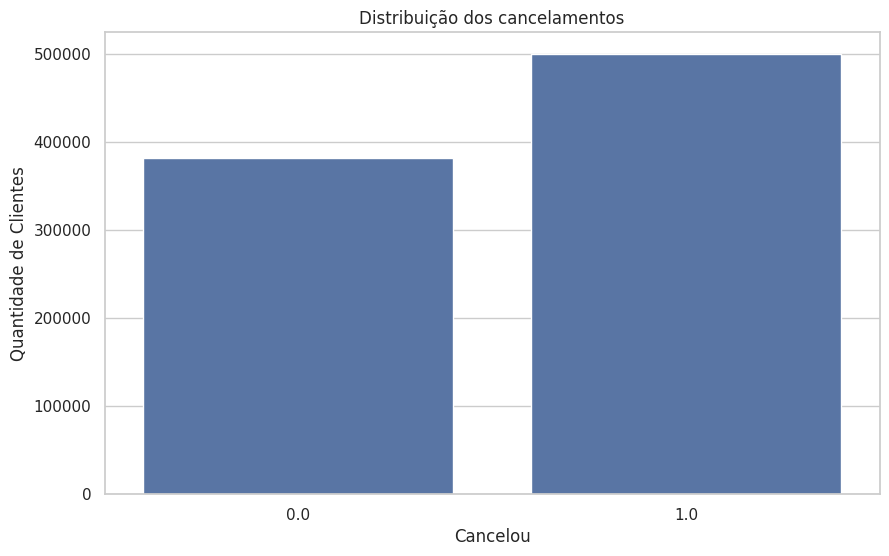

cancelou
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64


In [8]:
sns.countplot(data=df, x='cancelou')
plt.title("Distribuição dos cancelamentos")
plt.xlabel("Cancelou")
plt.ylabel("Quantidade de Clientes")
plt.show()

# Ver a proporção percentual
print(df['cancelou'].value_counts(normalize=True) * 100)

Nesse Dataset os clientes que cancelaram são representados pelo número 1, enquanto os que não cancelaram são representados pelo número 0.
Dito isto, podemos observar que existe uma alta taxa de cancelamentos, ultrapassando os 50%. A partir disso, vou buscar entender as causas desses cancelamentos e apresentar soluções para suprimir  a perda de clientes.

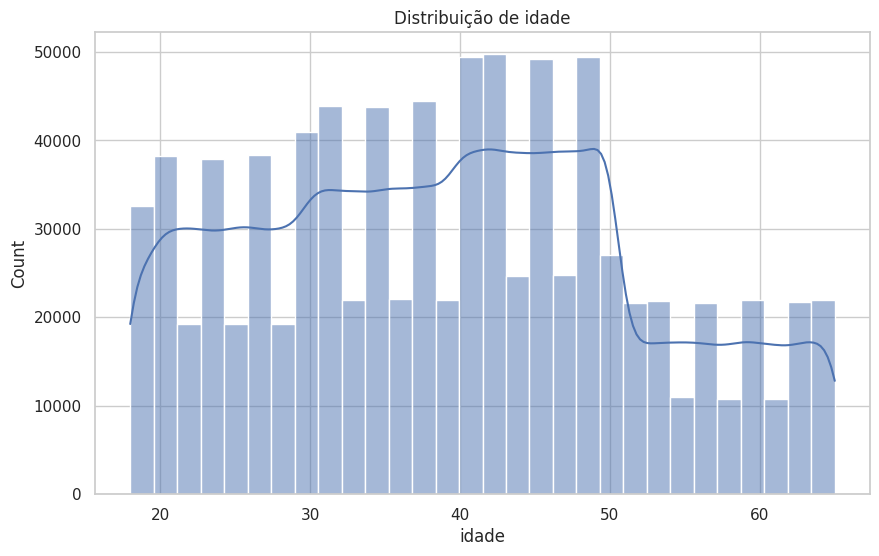

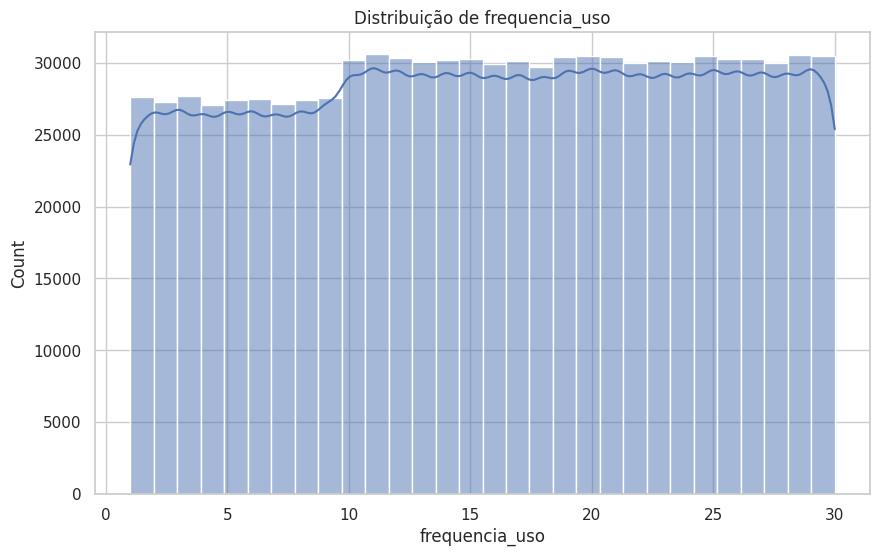

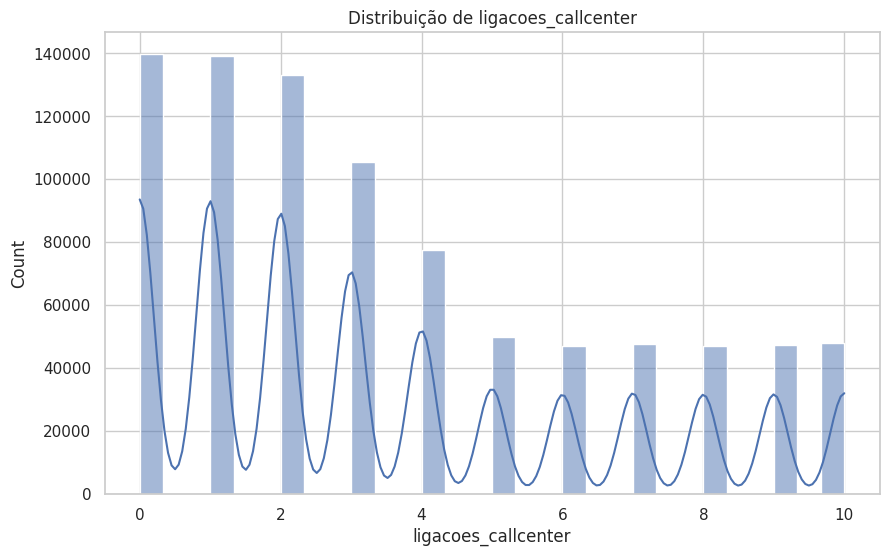

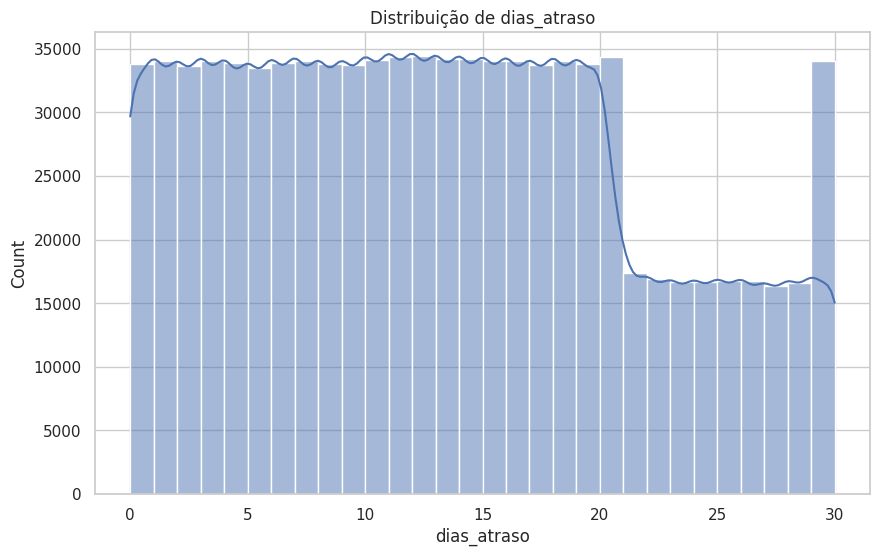

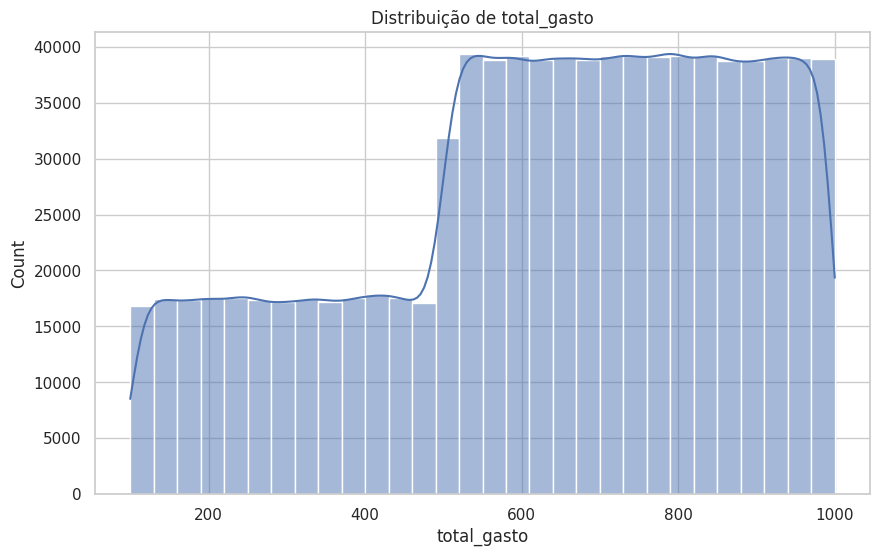

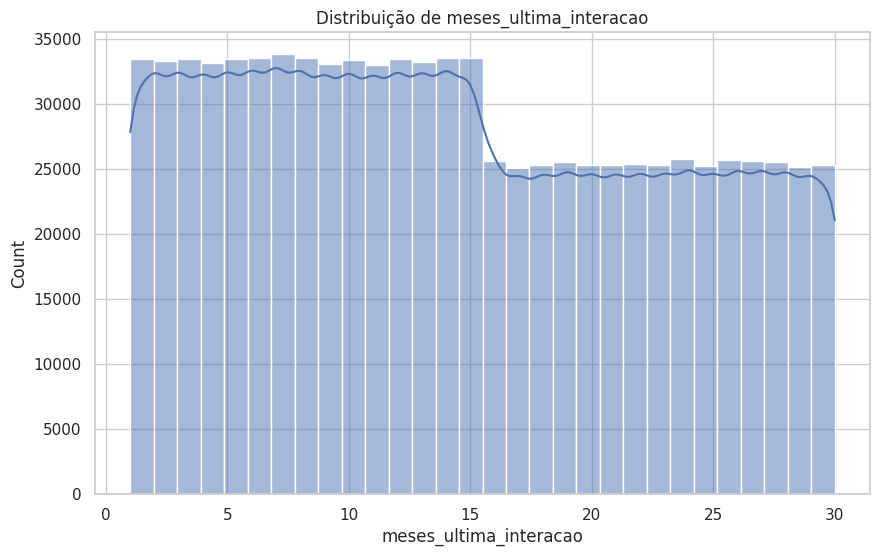

In [ ]:
# Visualização da distribuição geral de valores numéricos no Dataset.
variaveis_numericas = [
    'idade', 'frequencia_uso', 'ligacoes_callcenter',
    'dias_atraso', 'total_gasto', 'meses_ultima_interacao'
]

for var in variaveis_numericas:
    sns.histplot(data=df, x=var, bins=30, kde=True)
    plt.title(f'Distribuição de {var}')
    plt.show()

Vou fazer o cruzamento dos cancelamentos com outras variáveis do Dataset, para tentar identificar padrões.

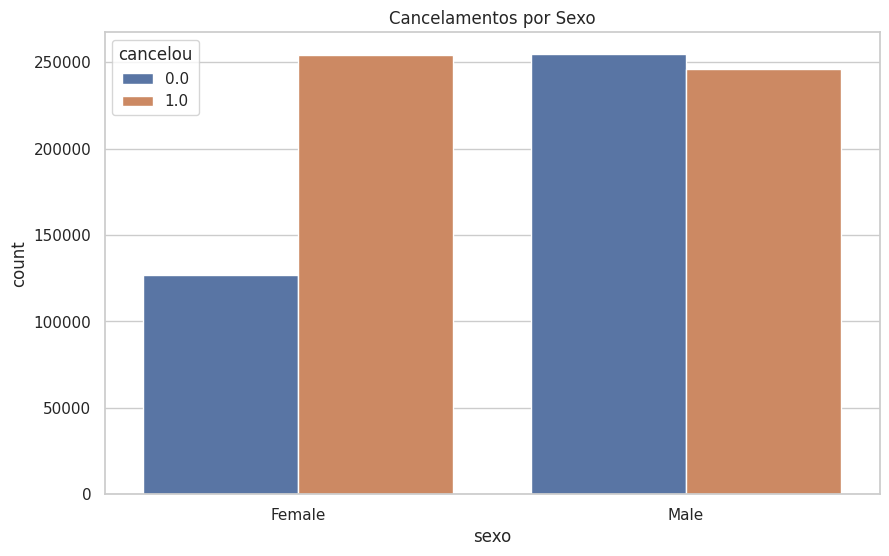

In [8]:
sns.countplot(data=df, x='sexo', hue='cancelou')
plt.title('Cancelamentos por Sexo')
plt.show()

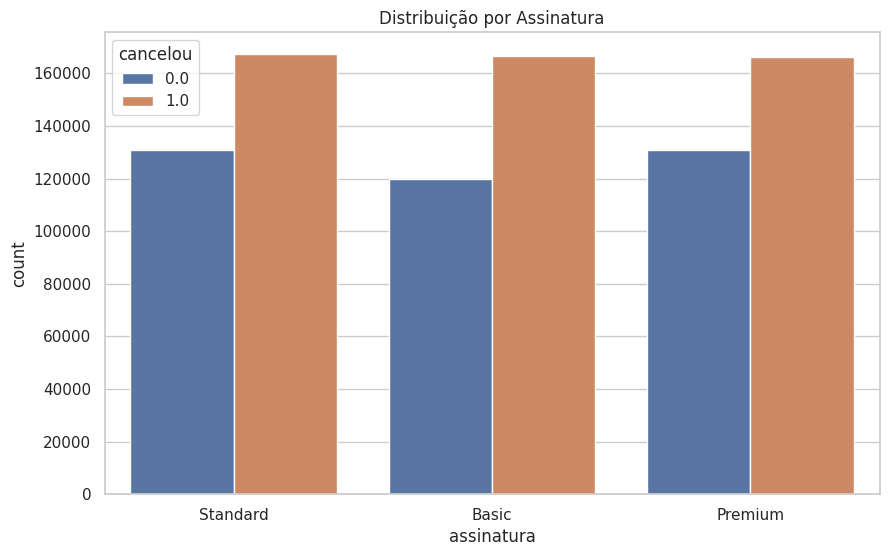

In [9]:
sns.countplot(data=df, x='assinatura', hue='cancelou')
plt.title('Distribuição por Assinatura')
plt.show()

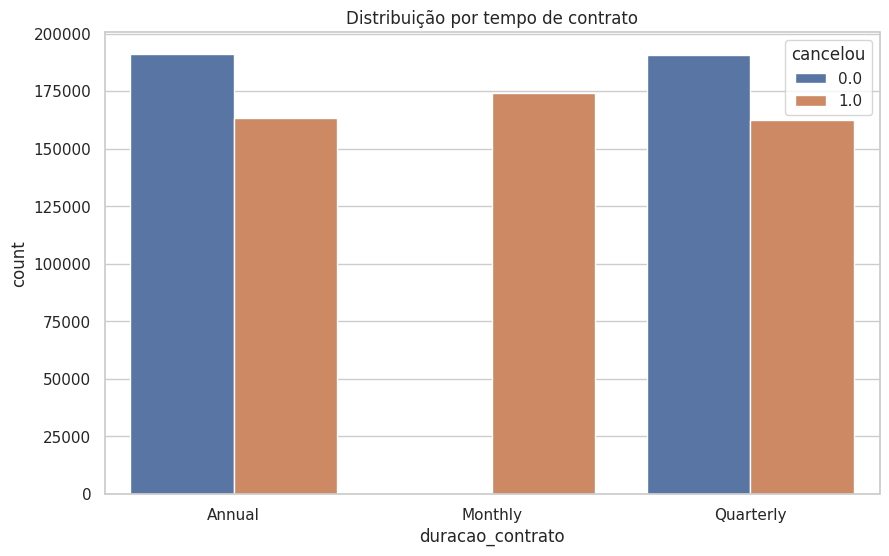

In [10]:
sns.countplot(data=df, x='duracao_contrato', hue='cancelou')
plt.title('Distribuição por tempo de contrato')
plt.show()

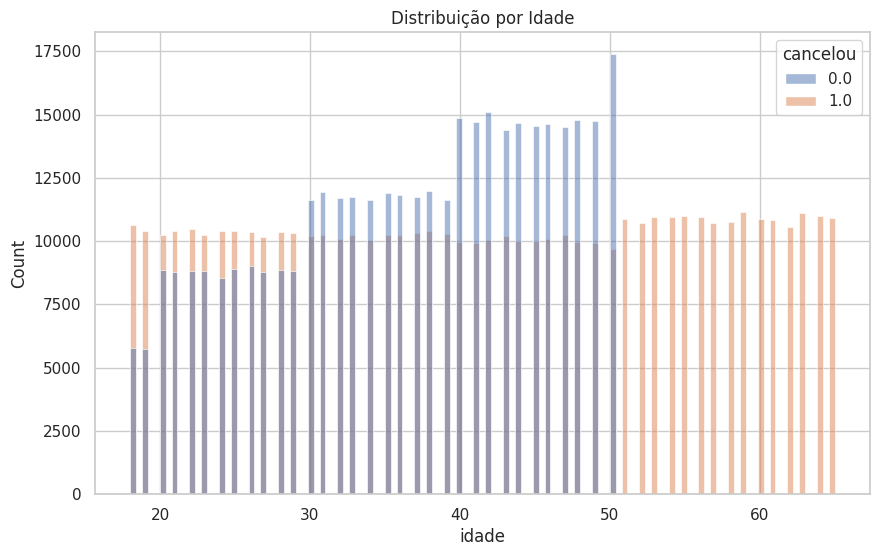

In [12]:
sns.histplot(data=df, x='idade', hue='cancelou')
plt.title('Distribuição por Idade')
plt.show()

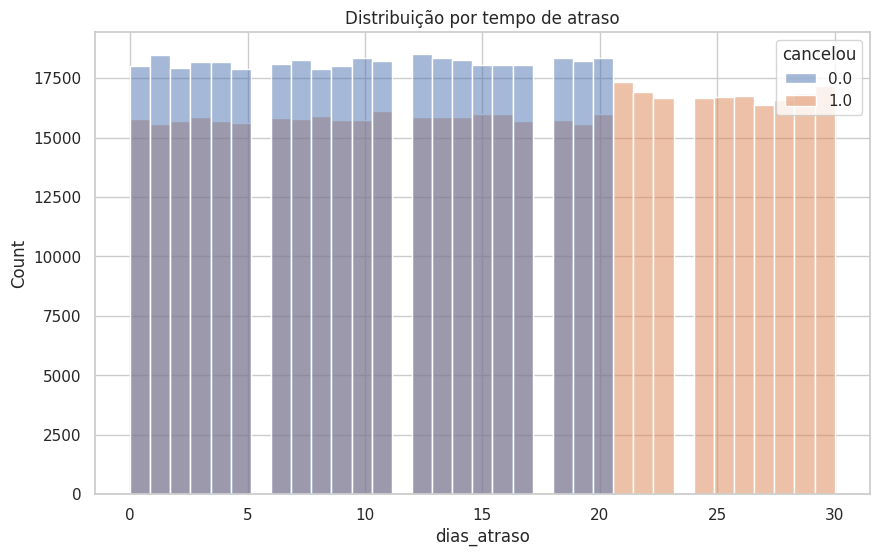

In [16]:
sns.histplot(data=df, x='dias_atraso', bins=35, hue='cancelou')
plt.title('Distribuição por tempo de atraso')
plt.show()

Após visualizar essa informações, podemos verificar alguns pontos importantes.

1 - O público feminino tem uma alta taxa de cancelamento.
    Indica maior insatisfação nesse segmento, ou talvez uma comunicação de retenção menos eficaz. É algo pra empresa investigar do ponto de vista de UX e marketing.

2 - 100% dos clientes com assinatura mensal cancelam.
    Hipótese: gente que entra só pra testar e já sai. Pode ser que o plano mensal atrai mais churners naturais. Um ótimo ponto para repensar o modelo.

3 - 50% dos clientes até 20 anos, e 100% dos clientes acima de 50 anos cancelam.
    Jovens até 20 → 50% cancelam → talvez sejam mais impulsivos ou não enxerguem valor a longo prazo.

    Acima de 50 → 100% de cancelamento. Pode ser problema de usabilidade, atendimento, ou falta de fit com o serviço.

4 - 100% dos clientes com mais de 20 dias de atraso cancelam.
    Essa aqui é praticamente uma regra de decisão pronta pro modelo!
    Cliente atrasou mais de 20 dias? Grandes chances de cancelamento.

In [ ]:
# Setando variáveis a partir dos insghts acima.

df['atraso_acima_20'] = df['dias_atraso'] > 20
df['idade_faixa'] = pd.cut(df['idade'], bins=[0, 20, 50, 100], labels=["Jovem", "Adulto", "Sênior"])
df['assinatura_mensal'] = df['assinatura'] == 'Mensal'


In [ ]:
# Análise de correlação
df_encoded = pd.get_dummies(df, drop_first=True)
correlacoes = df_encoded.corr()['cancelou'].sort_values(ascending=False)
print(correlacoes)


cancelou                      1.000000
ligacoes_callcenter           0.574267
duracao_contrato_Monthly      0.433551
atraso_acima_20               0.423995
idade_faixa_Sênior            0.416573
dias_atraso                   0.312129
idade                         0.218394
meses_ultima_interacao        0.149616
assinatura_Standard          -0.009249
assinatura_Premium           -0.011076
frequencia_uso               -0.046101
tempo_como_cliente           -0.051920
sexo_Male                    -0.175395
duracao_contrato_Quarterly   -0.176244
idade_faixa_Adulto           -0.387450
total_gasto                  -0.429355
CustomerID                   -0.839365
assinatura_mensal                  NaN
Name: cancelou, dtype: float64


Após fazer a análise de correlação, a variável ligações pro callcenter chamou a atenção, vamos visualizar graficamente.

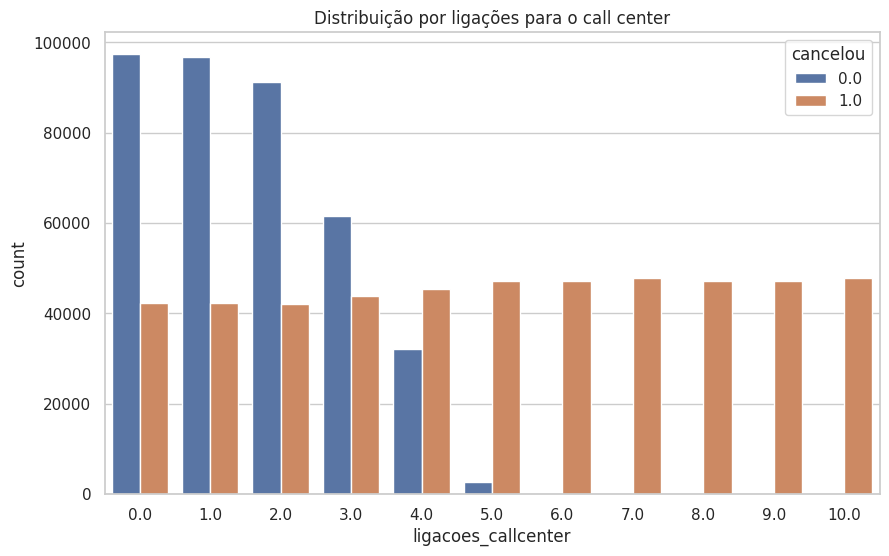

In [19]:
sns.countplot(data=df, x='ligacoes_callcenter', hue='cancelou')
plt.title('Distribuição por ligações para o call center')
plt.show()

E temos um novo insght! Podemos considerar que 100% dos clientes que ligam mais de 4 vezes para o call center cancelam.

Isso levanta dois pontos de alerta, o atendimento do call center e a resolução de problemas. Outros pontos de melhora.